In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import math 
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
!pip install minisom

In [4]:
mu = 0
std = 1
snd = stats.norm(mu, std)

In [5]:
s = np.linspace(0, 2*np.pi, num=1000)
x1 = np.cos(s) + 0.1*stats.norm(mu, std).pdf(s)
x2 = np.sin(s) + 0.1*stats.norm(mu, std).pdf(s)
x3 = s + 0.1*stats.norm(mu, std).pdf(s)

In [6]:
x1.shape, x2.shape, x3.shape

((1000,), (1000,), (1000,))

In [7]:
f = np.vstack((x1,x2,x3))

In [8]:
f

array([[ 1.03989423e+00,  1.03987366e+00,  1.03981196e+00, ...,
         9.99920886e-01,  9.99980221e-01,  1.00000000e+00],
       [ 3.98942280e-02,  4.61828723e-02,  5.24696898e-02, ...,
        -1.25786177e-02, -6.28943321e-03,  1.06728304e-10],
       [ 3.98942280e-02,  4.61829138e-02,  5.24700215e-02, ...,
         6.27060636e+00,  6.27689583e+00,  6.28318531e+00]])

In [9]:
z = np.array([x1,x2,x3])

### 3.1 3D Scatterplot

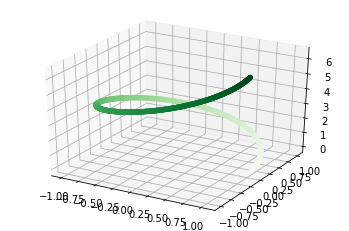

In [10]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line

ax.scatter3D(f[0,:], f[1,:], f[2,:], c=f[2,:], cmap='Greens');

In [11]:
import plotly.express as px

fig = px.scatter_3d(f, x=f[0,:], y=f[1,:], z=f[2,:],
              color=f[2,:])
fig.show()

In [12]:
from minisom import MiniSom    

In [13]:
finaldf = []
for j in range(0,1000):
  finaldf.append([x1[j],x2[j],x3[j]])
finaldf = np.array(finaldf)

In [14]:
finaldf.shape

(1000, 3)

In [15]:
finaldf = finaldf.reshape(3, 1000)
finaldf.shape

(3, 1000)

### 3.2 Fit SOM to the Data

In [16]:
def runSOM(sig):
  som = MiniSom(12, 12, 1000, sigma=sig, learning_rate=0.5) # initialization of 6x6 SOM
  som.train(finaldf, 100, verbose=True) # trains the SOM with 100 iterations
  return som.get_weights()

In [17]:
def get_xyz(som_weights):
    x,y,z = som_weights[:,:,0],som_weights[:,:,1],som_weights[:,:,2]
    return x,y,z

In [18]:
def plot_scatter3d(x,y,z,c='r'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=c, marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    fig.show()

#### sigma = 1.5

In [19]:
somWeights = runSOM(1.5)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.008178773209443636


In [20]:
x,y,z = get_xyz(somWeights)

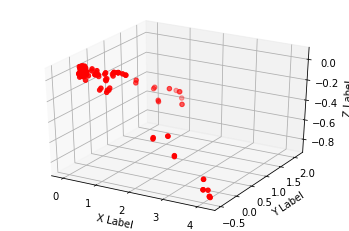

In [21]:
plot_scatter3d(x,y,z)

#### sigma = 2

In [22]:
somWeights = runSOM(2)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.0040476311439370735


In [23]:
x,y,z = get_xyz(somWeights)

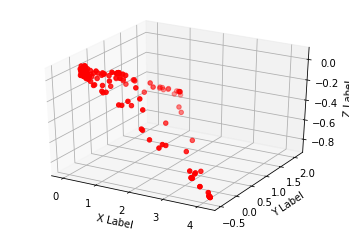

In [24]:
plot_scatter3d(x,y,z)

#### sigma = 3

In [25]:
somWeights = runSOM(3)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.00299271453602061


In [26]:
x,y,z = get_xyz(somWeights)

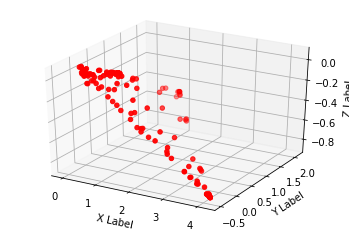

In [27]:
plot_scatter3d(x,y,z)

#### sigma = 4

In [28]:
somWeights = runSOM(4)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.003385865695732167


In [29]:
x,y,z = get_xyz(somWeights)

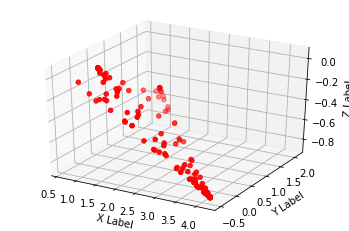

In [30]:
plot_scatter3d(x,y,z)

IGNORE BELOW

In [42]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [43]:
!jupyter nbconvert --to pdf IDVE_EXAM_Q3.ipynb

[NbConvertApp] Converting notebook IDVE_EXAM_Q3.ipynb to pdf
/usr/local/lib/python2.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) [u'text/html'] is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Support files will be in IDVE_EXAM_Q3_files/
[NbConvertApp] Making directory ./IDVE_EXAM_Q3_files
[NbConvertApp] Making directory ./IDVE_EXAM_Q3_files
[NbConvertApp] Making directory ./IDVE_EXAM_Q3_files
[NbConvertApp] Making directory ./IDVE_EXAM_Q3_files
[NbConvertApp] Making directory ./IDVE_EXAM_Q3_files
[NbConvertApp] Writing 44310 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: [u'xelatex', u'./notebook.tex', '-quiet']
This is XeTeX, Version 3.14159265-2.6-0.99998 (TeX Live 2017/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e